In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

In [32]:
from sklearn.datasets import make_moons
from sklearn.datasets import  make_circles

In [42]:
X, Y = make_moons(n_samples=10000,  shuffle=True,  noise=0.2, random_state=3)
x, y = make_circles(n_samples=10000,  shuffle=True,  noise=0.2, random_state=5)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.3)

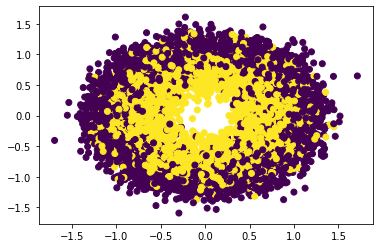

In [45]:
plt.scatter(x[:, 0], x[:, 1], c=y);


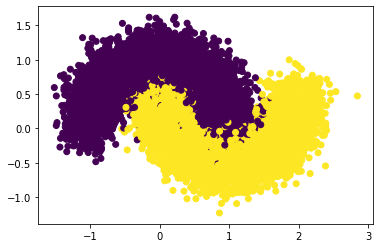

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

In [47]:
def softmax(a):
        ea = np.exp(a)
        return ea/np.sum(ea, axis = 1, keepdims=True)

In [48]:
class dnn:
    
    # initialize the parameters
    
    def __init__(self, input_size, hidden_layers, output_size):
        np.random.seed(0)
        
        layers = [input_size] + hidden_layers + [output_size] #although input does not cosidered as layers but lets say so
        
        params = {}
        
        for layer in range(1, len(layers)):
            # hessian initialization
            params['W'+str(layer)] = np.random.randn(layers[layer - 1], layers[layer])
            params['b'+str(layer)] = np.zeros((1, layers[layer]))
            
        self.layers = layers
        self.params = params
        
    
    
    def forward(self, x):
        
        activations = []
        # inputs are the activation for the very first layer
        activations.append(x)
        m = len(self.layers)
        for layer in range(1, m):
            z = np.dot(activations[-1], self.params['W'+str(layer)]) + self.params['b'+str(layer)]
            
            # we use softmax activation function at output layer
            if layer < m - 1:
                a = np.tanh(z)
            else:
                a = softmax(z)
                
            activations.append(a)
        
        return activations
    
    
    
    
    def backward(self, x, y, activations):
        
        y_ = activations[-1]
        m = x.shape[0]
        
        grads_dw = []
        grads_db = []
        
        delta = y_ - y
        dw = (1/m)*np.dot(activations[-2].T, delta)
        db = np.mean(delta, axis = 0, keepdims=True)
        grads_dw.insert(0, dw)
        grads_db.insert(0, db)
        # grads for output layer has been evaluated
        
        for current_layer in range(len(self.layers) - 2, 0, -1):
            delta = (1 - np.square(activations[current_layer]))*np.dot(delta, self.params['W'+str(current_layer + 1)].T)
            dw = (1/m)*np.dot(activations[current_layer - 1].T, delta)
            db = np.mean(delta, axis = 0, keepdims=True)
            grads_dw.insert(0, dw)
            grads_db.insert(0, db)

        return grads_dw, grads_db        
        
        
        
    def update_params(self, grads_dw, grads_db, learning_rate = 0.01):
        # size of the grads will be 1 less than the size of layers because
        # we don't have to calculate the grads for input (I call it pseudo layer)
        for current_grads in range(len(grads_dw) - 1, -1, -1):
            self.params['W'+str(current_grads + 1)] -= learning_rate*grads_dw[current_grads]
            self.params['b'+str(current_grads + 1)] -= learning_rate*grads_db[current_grads]
    
    def loss(self, y_oht,p):
        l = -np.mean(y_oht*np.log(p))
        return l   
    
    def predict(self,x):
        y_out = self.forward(x)[-1]
        return np.argmax(y_out,axis=1)
        
        

In [49]:
# def train(X, Y, model):
#     loss = []
#     y_oht = pd.get_dummies(Y).values
#     for i in range(3000):
#         a =  model.forward(X)
#         loss.append(model.loss(y_oht, a[-1]))
#         grads_dw, grads_db = model.backward(X, y_oht, a)
#         model.update_params(grads_dw, grads_db, learning_rate=0.025)
#     return loss

# mini batch gradient 
def train(X, Y, model, batch_size = 512, epochs = 100):
    loss = []
    y_oht = pd.get_dummies(Y).values
    m = X.shape[0]
    for batch in range(0, m, batch_size):
        for epoch in range(epochs):
            if batch + batch_size < m:
                a =  model.forward(X[batch:batch+batch_size])
                loss.append(model.loss(y_oht[batch:batch+batch_size], a[-1]))
                grads_dw, grads_db = model.backward(X[batch:batch+batch_size], y_oht[batch:batch+batch_size], a)
                model.update_params(grads_dw, grads_db, learning_rate=0.025)
            else:
                a =  model.forward(X[batch:])
                loss.append(model.loss(y_oht[batch:], a[-1]))
                grads_dw, grads_db = model.backward(X[batch:], y_oht[batch:], a)
                model.update_params(grads_dw, grads_db, learning_rate=0.025)
            
            
    return loss


In [61]:
model_moons = dnn(2, [4, 2, 3], 2)
model_circles = dnn(2, [4, 2, 3], 2)

In [62]:
loss_moons = train(X_train, Y_train, model_moons, batch_size=512)

In [63]:
loss_circles = train(x_train, y_train, model_circles, batch_size=512) 

0.24906614149047712 0.05402533408158509


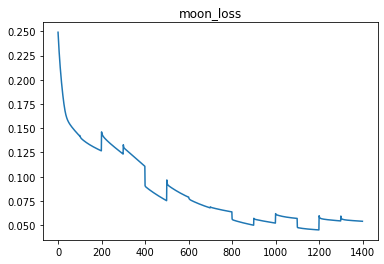

In [64]:
plt.plot(loss_moons)
plt.title('moon_loss')
print(loss_moons[0], loss_moons[-1])

0.7544405051574334 0.2888097968519284


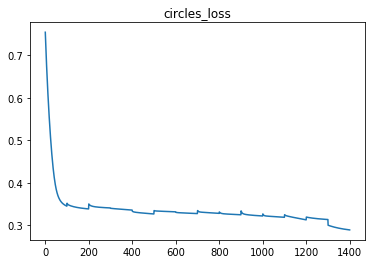

In [65]:
plt.plot(loss_circles);
plt.title('circles_loss')
print(loss_circles[0], loss_circles[-1])

### visualizing the decision boundary

In [66]:
import sys
sys.path.insert(0, '../resources/')
from visualize import plot_decision_boundary

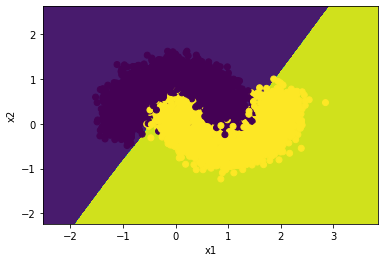

In [67]:
plot_decision_boundary(lambda x:model_moons.predict(x),X,Y)

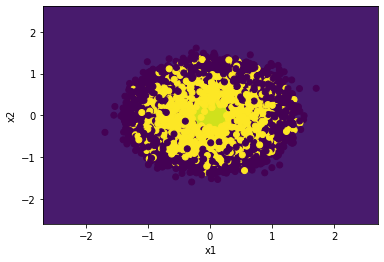

In [68]:
plot_decision_boundary(lambda x:model_circles.predict(x),x,y)

### accuracy

In [69]:
import sklearn.metrics as score

In [70]:
y_moons = model_moons.predict(X_test)
y_circles = model_circles.predict(x_test)

In [71]:
print(score.accuracy_score(y_moons, Y_test))
print(score.accuracy_score(y_circles, y_test))

0.967
0.699
